In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
#Directory to dataset in drive
from google.colab import drive
drive.mount ('/content/gdrive', force_remount=True)



Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
image_size = (150,150)
batch_size = 10
dataset_path ='/content/drive/MyDrive/Colab-Notebooks/Pistachio_Image_Dataset'
#Data Generators 

train_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_g = train_gen.flow_from_directory(
    directory = dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "binary",
    subset = "training")
val_g = train_gen.flow_from_directory(
    directory = dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "binary",
    subset = "validation"
) 


Found 1727 images belonging to 2 classes.
Found 431 images belonging to 2 classes.


In [7]:
def plotImages (images_arr):
  fig,axes = plt.subplots(1,5)
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

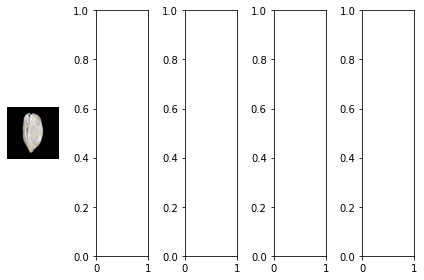

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[0. 1. 1. 1. 0.]


In [8]:
imgs,labels = next(train_g)
plotImages(imgs)
print(labels[:5])

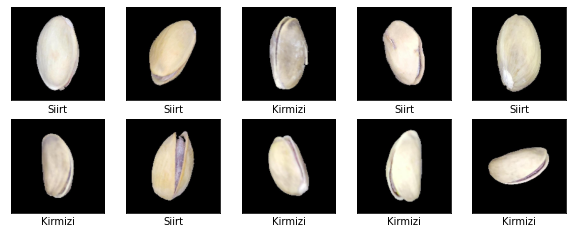

In [9]:
#Verify data
class_names = ['Kirmizi', 'Siirt']
img,lab = next(train_g)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[i])
    plt.xlabel(class_names[lab[i].astype('int32')])
plt.show()

In [10]:
#create model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [11]:
#Add dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [12]:
#Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.summary()

history = model.fit(train_g,
                    epochs = 10,
                    verbose=1,
                    validation_data=val_g)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

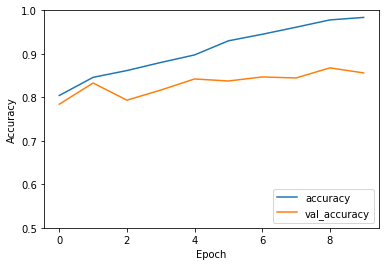

In [13]:
#Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [14]:
test_loss, test_acc = model.evaluate(val_g, verbose=2)

print(test_acc)

44/44 - 6s - loss: 0.6876 - accuracy: 0.8561 - 6s/epoch - 135ms/step
0.8561484813690186
